In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#create an array of periods and find median

'''periods = np.array([])
q = 7
s = 1

while q <= 15:
    s = 1
    while s <= 3:

        if q < 10:
            qs = '_q0' + str(q) + '_' + str(s)

        else:
            qs = '_q' + str(q) + '_' + str(s)

        df = pd.read_csv('KIC4150611_TTV' + qs + '/posteriors.dat', delimiter="\t \t", engine = "python")

        periods = np.append(periods,df.iloc[-3,1])

        s = s + 1

    q = q + 1'''


In [27]:
P_p1 = 1.434205

q07_1 = pd.read_csv('KIC4150611_TTV_q07_1/posteriors.dat', delimiter="\t \t", engine = "python")

t0_p1 = q07_1.iloc[-1,1]

print(P_p1,t0_p1)


1.434205 631.1664370994


In [28]:
#create an array of estimated transit times
transit_times = []
transit_numbers = []


q15_3 = pd.read_csv('KIC4150611_TTV_q15_3/posteriors.dat', delimiter="\t \t", engine = "python")

transit_times.append(t0_p1)

while t0_p1 < q15_3.iloc[-4,1]:
    t0_p1 = t0_p1 + P_p1
    transit_times.append(t0_p1)

print(transit_times,len(transit_times))

[631.1664370994, 632.6006420994, 634.0348470994, 635.4690520994001, 636.9032570994001, 638.3374620994001, 639.7716670994001, 641.2058720994002, 642.6400770994002, 644.0742820994002, 645.5084870994002, 646.9426920994002, 648.3768970994003, 649.8111020994003, 651.2453070994003, 652.6795120994003, 654.1137170994003, 655.5479220994004, 656.9821270994004, 658.4163320994004, 659.8505370994004, 661.2847420994004, 662.7189470994005, 664.1531520994005, 665.5873570994005, 667.0215620994005, 668.4557670994005, 669.8899720994006, 671.3241770994006, 672.7583820994006, 674.1925870994006, 675.6267920994006, 677.0609970994007, 678.4952020994007, 679.9294070994007, 681.3636120994007, 682.7978170994007, 684.2320220994008, 685.6662270994008, 687.1004320994008, 688.5346370994008, 689.9688420994008, 691.4030470994009, 692.8372520994009, 694.2714570994009, 695.7056620994009, 697.1398670994009, 698.574072099401, 700.008277099401, 701.442482099401, 702.876687099401, 704.310892099401, 705.745097099401, 707.179

In [29]:
#aggregate other times -> compare observed times with calculated times -> if within certain range -> jot down transit number -> get an array of transit numbers


o_minus_c = []
q = 7
j = 0


while q <= 15:
    s = 1

    while s <= 3:

        if q < 10:
            qs = '_q0' + str(q) + '_' + str(s)

        else:
            qs = '_q' + str(q) + '_' + str(s)

        df = pd.read_csv('KIC4150611_TTV' + qs + '/posteriors.dat', delimiter="\t \t", engine = "python")

        i = 10

        while df.iloc[i,1] != df.iloc[-3,1]:

            while abs(df.iloc[i,1]-transit_times[j]) > 0.05:
                print(q,s,i,j)
                j = j + 1
                print(df.iloc[i,1]-transit_times[j])

            o_minus_c.append(24*60*(df.iloc[i,1]-transit_times[j]))
            transit_numbers.append(j)
            i = i + 1

        s = s + 1

    q = q + 1

print(o_minus_c,transit_numbers)

7 1 11 0
0.0020762599999670783
7 1 12 1
-0.00038732970006094547
7 1 13 2
-0.00012148820007951144
7 1 14 3
-0.0014485461000504074
7 1 15 4
0.012273283599938623
7 1 16 5
-0.005665054000132841
7 1 17 6
-0.0017000400001734306
7 1 18 7
0.0019951013998706912
7 1 19 8
0.0003480846997945264
7 1 20 9
-0.001400453400265178
7 1 21 10
-0.00021758400021099078
7 1 22 11
-0.0007710438002277442
7 1 23 12
-0.001987788300311877
7 1 24 13
-0.0021687992002625833
7 1 25 14
-0.001415758100279163
7 1 26 15
-0.0018134900003587973
7 1 27 16
8.386699960283295e-05
7 1 28 17
-0.0005464950003215563
7 1 29 18
0.001990975299577258
7 1 30 19
0.006341088799558747
7 2 10 20
-0.0009162424004216518
7 2 11 21
0.0009008786995536866
7 2 12 22
-0.003821697800503898
7 2 13 23
-9.516690045074938e-05
7 2 14 24
1.4344513337995295
7 2 14 25
0.00024633379950955714
7 2 15 26
-0.00556685660058065
7 2 16 27
4.386789942145697e-05
7 2 17 28
-0.0027175843006261857
7 2 18 29
0.0010452400994154232
7 2 19 30
0.0009913982993339232
7 2 20 31

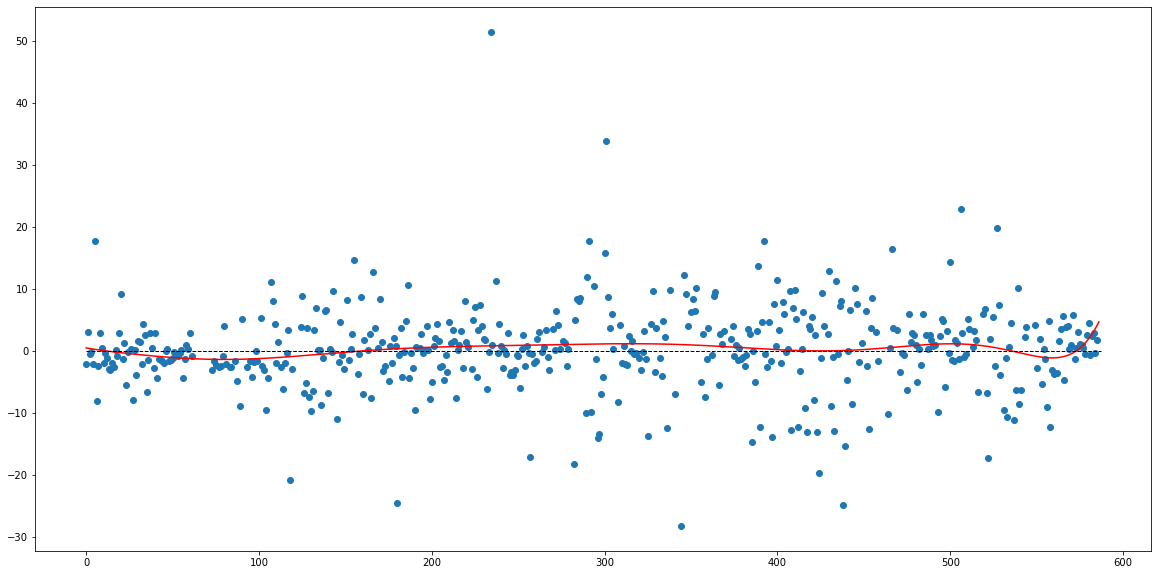

In [32]:
poly = np.poly1d(np.polyfit(transit_numbers,o_minus_c,10))
x = []
y = []


for i in range (len(transit_times)):
    x.append(i)
    y.append(poly(i))

fig = plt.figure(figsize=(20,10))


plt.plot(x,y,color='red')
plt.scatter(transit_numbers,o_minus_c)
plt.plot([-0.1,len(transit_times)],[0.,0],'--',linewidth=1,color='black',zorder=2)

In [22]:
t0_p1

1471.5770928174002

In [18]:
P_p1

1.4341478766518518